# Load ASD dataset

## imports

In [22]:
from pathlib import Path
from monkey_functions import *
from InverseFuncs import *
from matplotlib import pyplot as plt
from torch.distributions.multivariate_normal import MultivariateNormal
import torch
import pickle

## define data path

In [23]:
datapath = Path('/home/yc/repo/mkdata')
numhsub, numasub = 25, 14  # these are the actual number of subject
numsub = max(numasub, numhsub)

In [24]:
asd_data_set = {}

for tag in ['h', 'a']:  # heathy, asd
    for isub in range(numsub):
        thesub = "{}sub{}".format(tag, str(isub))
        filename = Path(datapath/'human/{}'.format(thesub))
        # print(filename)
        
        if filename.is_file():
            with open(datapath/'human/{}'.format(thesub), 'rb') as f:
                states, actions, tasks = pickle.load(f)
            print(f'number of trials for {thesub}: {len(states)}')
            asd_data_set['data_'+thesub] = states, actions, tasks

number of trials for hsub0: 148
number of trials for hsub1: 147
number of trials for hsub2: 146
number of trials for hsub3: 145
number of trials for hsub4: 147
number of trials for hsub5: 146
number of trials for hsub6: 148
number of trials for hsub7: 145
number of trials for hsub8: 145
number of trials for hsub9: 144
number of trials for hsub10: 145
number of trials for hsub11: 147
number of trials for hsub12: 145
number of trials for hsub13: 147
number of trials for hsub14: 149
number of trials for hsub15: 146
number of trials for hsub16: 141
number of trials for hsub17: 143
number of trials for hsub18: 136
number of trials for hsub19: 148
number of trials for hsub20: 147
number of trials for hsub21: 148
number of trials for hsub22: 142
number of trials for hsub23: 150
number of trials for hsub24: 148
number of trials for asub0: 147
number of trials for asub1: 140
number of trials for asub2: 146
number of trials for asub3: 146
number of trials for asub4: 147
number of trials for asub

## the entire dataset

the data is in this format:  
a dict of each subjects  
key is the name of subject. first, data_.  
then a tag, either h or a. for health or asd.  
then the subject id.  

In [29]:
for k in asd_data_set.keys():
    print(k)

data_hsub0
data_hsub1
data_hsub2
data_hsub3
data_hsub4
data_hsub5
data_hsub6
data_hsub7
data_hsub8
data_hsub9
data_hsub10
data_hsub11
data_hsub12
data_hsub13
data_hsub14
data_hsub15
data_hsub16
data_hsub17
data_hsub18
data_hsub19
data_hsub20
data_hsub21
data_hsub22
data_hsub23
data_hsub24
data_asub0
data_asub1
data_asub2
data_asub3
data_asub4
data_asub5
data_asub6
data_asub7
data_asub8
data_asub9
data_asub10
data_asub11
data_asub12
data_asub13


## subject level data

in each subject data, we have states, actions, tasks

In [31]:
states, actions, tasks= asd_data_set[k]

states are a list of array.  
each array is one trial. so the len of list is number of trials for this subjects.

the same rule applys to actions and tasks

In [38]:
print(f'subject: {k}, \nnumber of trials: {(len(states))},\nshape of states for 1st trial: {states[0].shape}')
print(f'\nshape of actions for 1st trial: {actions[0].shape}')
print(f'\nshape of task for 1st trial: {tasks[0].shape}')

subject: data_asub13, 
number of trials: 146,
shape of states for 1st trial: torch.Size([30, 5])

shape of actions for 1st trial: torch.Size([30, 2])

shape of task for 1st trial: (2,)


## trial level data


for each trial, we have array of states, actions, and a vector of target location.

states: n_timestamp, 5 dim. the 5 dims are (x, y, heading direction, forward v, angular w)
to convert it to actual world unit, dot the state with [200cm, 200cm, 1 rad (or 180/pi degree), 200cm/s, 1 rad] (not sure for now and need double check. but without converting the unit you shoudl be able to use the data already)


actions: n_timestamp, 2 dim. the 2 dims are (vcontrol, wcontrol) the range of controls are [-1,1]


the tasks: (targert x, target y.)

the ts has dt=0.1s.  


In [41]:
print(f'\nshape of states for 1st trial: {states[0].shape}')
print(f'\nshape of actions for 1st trial: {actions[0].shape}')
print(f'\nshape of task for 1st trial: {tasks[0].shape}')


shape of states for 1st trial: torch.Size([30, 5])

shape of actions for 1st trial: torch.Size([30, 2])

shape of task for 1st trial: (2,)


Text(0.5, 1.0, 'state path')

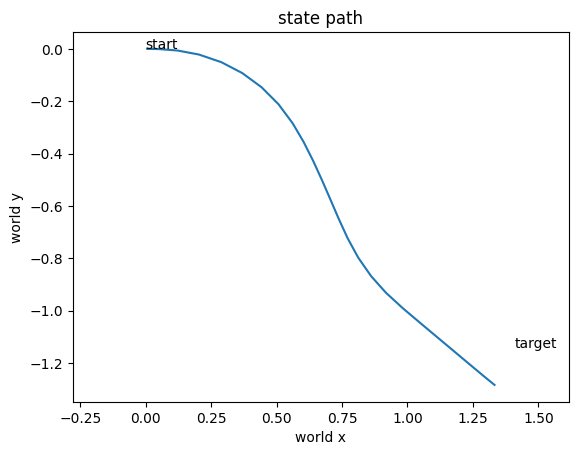

In [48]:
fig,ax=plt.subplots(1,1)
plt.plot(states[0][:,0],states[0][:,1])
plt.axis('equal')
plt.text(0,0,'start')
plt.text(tasks[0][0], tasks[0][1], 'target')
plt.xlabel('world x')
plt.ylabel('world y')
plt.title('state path')

Text(0.5, 1.0, 'state heading')

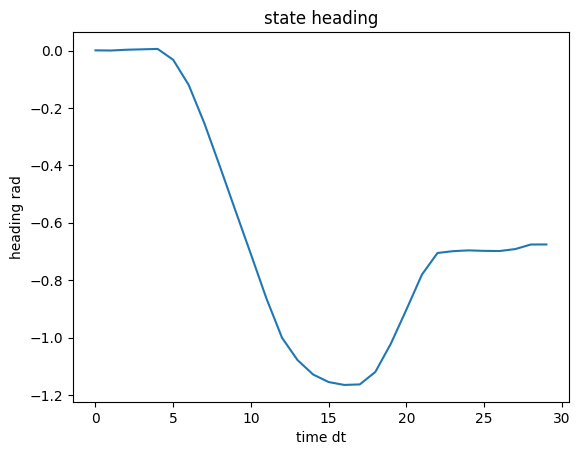

In [50]:
fig,ax=plt.subplots(1,1)
plt.plot(states[0][:,2])
plt.xlabel('time dt')
plt.ylabel('heading rad')
plt.title('state heading')

Text(0.5, 1.0, 'control, blue=foward v. organge=angular w')

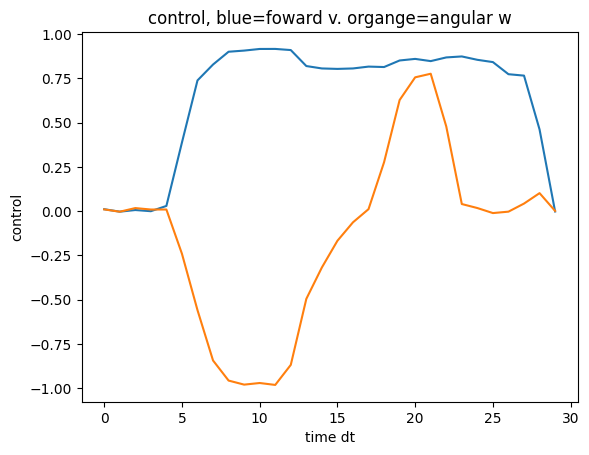

In [52]:
fig,ax=plt.subplots(1,1)
plt.plot(actions[0])
plt.xlabel('time dt')
plt.ylabel('control [a.u.] range is [-1,.1]')
plt.title('control, blue=foward v. organge=angular w')

Text(0.5, 1.0, 'state velocities, blue=foward v. organge=angular w')

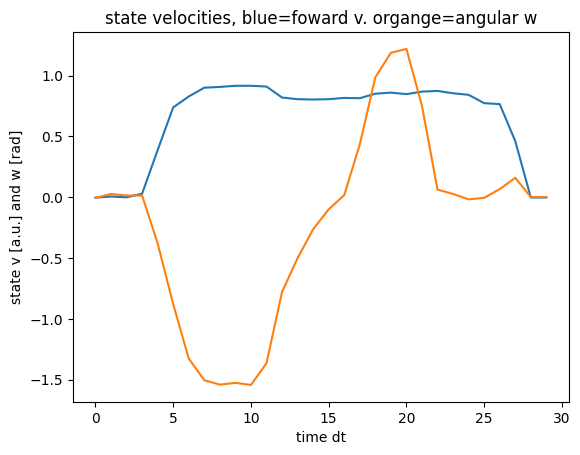

In [54]:
fig,ax=plt.subplots(1,1)
plt.plot(states[0][:,[3,4]])
plt.xlabel('time dt')
plt.ylabel('state v [a.u.] and w [rad]')
plt.title('state velocities, blue=foward v. organge=angular w')